In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from collections import OrderedDict
import matplotlib.pyplot as plt
import joblib


In [2]:
df = pd.read_excel(r'KAYIT2.xlsx')


In [3]:
df.drop(["PHOTO"], axis = 1, inplace = True)


In [4]:
# HIST_control sütununu işle
hist_control_array = np.array([np.fromstring(x, dtype=int, sep=" ") for x in df["HIST_control"]])
df = df.drop(columns=["HIST_control"])
for i in range(hist_control_array.shape[1]):
    df[f"HIST_control_{i}"] = hist_control_array[:, i]

hist_test_array = np.array([np.fromstring(x, dtype=int, sep=" ") for x in df["HIST_test"]])
df = df.drop(columns=["HIST_test"])
for i in range(hist_test_array.shape[1]):
    df[f"HIST_test_{i}"] = hist_test_array[:, i]

c:\Users\berka\desktop\Proje\medical_data_detectron2\venv\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
c:\Users\berka\desktop\Proje\medical_data_detectron2\venv\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.


In [5]:
y = df["KONSANTRASYON"].values.reshape(-1,)
x = df.drop(["KONSANTRASYON"], axis = 1)


In [6]:

# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)
# y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1) # y dizisi aynı boyutta bırak

# x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 0, shuffle=True)

# model = GradientBoostingRegressor().fit(x_train, y_train)
# y_pred = model.predict(x_test)
# y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
# y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

# r2 = r2_score (y_test, y_pred)

# model_ismi = GradientBoostingRegressor.__name__

# print( "R2_Score ---> ", r2)

In [7]:

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = (y.reshape(-1, 1)).reshape(-1) # y dizisi aynı boyutta bırak

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 0, shuffle=True)

model = GradientBoostingRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

r2 = r2_score (y_test, y_pred)

model_ismi = GradientBoostingRegressor.__name__

print( "R2_Score ---> ", r2)

R2_Score --->  0.9575445650524704


In [8]:
joblib.dump(model, 'model.joblib')


['model.joblib']

In [9]:
x_train.shape

(76, 522)

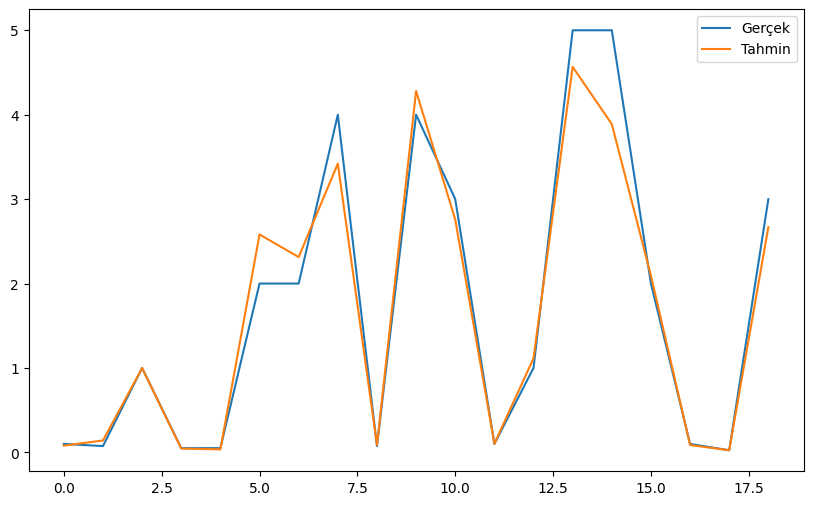

In [10]:
# gerçek ve tahmini değerleri birleştirerek bir veri çerçevesi oluştur
df_results = pd.DataFrame({'y_test': y_test.flatten(), 'y_pred': y_pred.flatten()})

# gerçek ve tahmini değerleri bir grafikte göster
plt.figure(figsize=(10, 6))
plt.plot(df_results['y_test'], label='Gerçek')
plt.plot(df_results['y_pred'], label='Tahmin')
plt.legend()
plt.show()


In [11]:
print(y_pred)
print(y_test)

[0.07966482 0.14105203 0.99830018 0.04483376 0.03602307 2.58143603
 2.31390294 3.4199818  0.08737083 4.28084537 2.75757248 0.10227465
 1.11493685 4.56659705 3.88847529 2.09274838 0.08715478 0.02616174
 2.66881459]
[0.1   0.075 1.    0.05  0.05  2.    2.    4.    0.075 4.    3.    0.1
 1.    5.    5.    2.    0.1   0.025 3.   ]


In [12]:
# print(y_pred_inv)
# print(y_test_inv)

NameError: name 'y_pred_inv' is not defined

In [13]:
print(abs(y_test-y_pred)/y_test)

[0.2033518  0.88069373 0.00169982 0.10332478 0.27953857 0.29071801
 0.15695147 0.14500455 0.16494436 0.07021134 0.08080917 0.02274651
 0.11493685 0.08668059 0.22230494 0.04637419 0.12845218 0.04646948
 0.11039514]


In [14]:
df2 = pd.read_excel(r'KAYIT2.xlsx', sheet_name='Sheet', skiprows=61, header=None, index_col=None)
df3=df2.iloc[4]
df3

0                                                     2
1                              photo6012449616328507205
2                                                    96
3                                                     0
4                                                   194
5                                                   146
6                                                   176
7                                                    34
8                                            197.830065
9                                            108.420435
10                                            14.065208
11                                            10.412513
12    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
13    1 1 1 2 3 3 9 7 8 12 10 30 45 55 58 69 103 110...
Name: 4, dtype: object

In [15]:
Label_list = ['MIN_control', 'MIN_test', 'MAX_control', 'MAX_test', 'AVG_control', 'AVG_test', 'VAR_control', 'VAR_test', 'STD_control', 'STD_test','HIST_control','HIST_test']
Data_List = [df3[2],df3[3],df3[4],df3[5],df3[6],df3[7],df3[8],df3[9],df3[10],df3[11],df3[12],df3[13]]
new_data = pd.Series(Data_List, index=Label_list)
new_data = pd.Series(new_data).values.reshape(1, -1)
df4 = pd.DataFrame(new_data)
df4.columns = Label_list
df4

,MIN_control,MIN_test,MAX_control,MAX_test,AVG_control,AVG_test,VAR_control,VAR_test,STD_control,STD_test,HIST_control,HIST_test
0,96,0,194,146,176,34,197.830065,108.420435,14.065208,10.412513,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,1 1 1 2 3 3 9 7 8 12 10 30 45 55 58 69 103 110...


In [16]:

# HIST_control sütununu işle
hist_control_array1 = np.array([np.fromstring(x, dtype=int, sep=" ") for x in df4["HIST_control"]])
df4 = df4.drop(columns=["HIST_control"])
for i in range(hist_control_array1.shape[1]):
    df4[f"HIST_control_{i}"] = hist_control_array1[:, i]



c:\Users\berka\desktop\Proje\medical_data_detectron2\venv\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [17]:
# HIST_test sütununu işle
hist_test_array1 = np.array([np.fromstring(x, dtype=int, sep=" ") for x in df4["HIST_test"]])
df4 = df4.drop(columns=["HIST_test"])
for i in range(hist_control_array.shape[1]):
    df4[f"HIST_test_{i}"] = hist_test_array1[:, i]

c:\Users\berka\desktop\Proje\medical_data_detectron2\venv\lib\site-packages\ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [18]:

regressor1 = GradientBoostingRegressor()
regressor1.fit(x_train, y_train)

y_pred1 = regressor1.predict(df4)
# y_pred1_inv = scaler.inverse_transform(y_pred1.reshape(-1,1))

print(y_pred1)


[2.09409013]


c:\Users\berka\desktop\Proje\medical_data_detectron2\venv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
